In [1]:
import osmnx as ox
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [12]:
place_name = "Victoria de Durango, Mexico"
G = ox.graph_from_place(place_name, network_type='drive')


nodes = ox.graph_to_gdfs(G, nodes=True, edges=False)

coords = np.array(list(zip(nodes['y'], nodes['x'])))


knn = NearestNeighbors(n_neighbors=5)
knn.fit(coords)

NearestNeighbors()

In [3]:
def get_nearest_node(lat, lon, knn_model, nodes):
    dist, idx = knn_model.kneighbors([(lat, lon)])
    nearest_node = nodes.iloc[idx[0][0]].name
    return nearest_node

def find_route(start_point, end_point, knn_model, G, nodes):
    start_node = get_nearest_node(start_point[0], start_point[1], knn_model, nodes)
    end_node = get_nearest_node(end_point[0], end_point[1], knn_model, nodes)
    route = nx.shortest_path(G, start_node, end_node, weight='length')
    return route

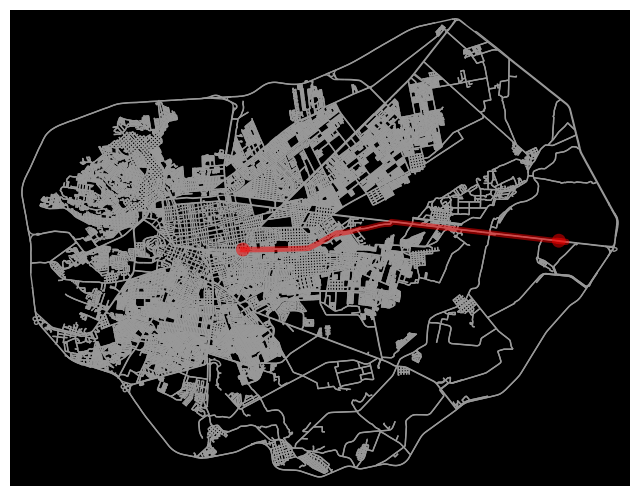

In [13]:
start_lat, start_lon = 24.0198,-104.6517  # Ejemplo: Downtown
end_lat, end_lon = 24.02242,-104.53810  # Ejemplo: Unipoli

start_point = (start_lat, start_lon)
end_point = (end_lat, end_lon)


route = find_route(start_point, end_point, knn, G, nodes)


fig, ax = ox.plot_graph_route(G, route, route_linewidth=4, node_size=0, bgcolor='k')
plt.show()

In [29]:
def extract_route_coordinates(G, route):
    route_coords = []
    for node in route:
        point = (G.nodes[node]['y'], G.nodes[node]['x'])
        route_coords.append(point)
    return route_coords

route_coords = extract_route_coordinates(G, route)
print(route_coords)

[(24.0198389, -104.6517281), (24.0198342, -104.6509552), (24.0198186, -104.649975), (24.0198066, -104.6489281), (24.0198152, -104.6480999), (24.019824, -104.6469171), (24.0198593, -104.6453673), (24.0198589, -104.6445058), (24.0198814, -104.6435314), (24.0199022, -104.6421643), (24.0199071, -104.6417135), (24.0199229, -104.6407991), (24.0199481, -104.639156), (24.0199691, -104.6386598), (24.0199784, -104.6381795), (24.0200051, -104.6367218), (24.0200212, -104.6360868), (24.0200244, -104.6355721), (24.0200286, -104.6353096), (24.020036, -104.6348496), (24.0200517, -104.6338706), (24.0200835, -104.6328658), (24.020103, -104.6318751), (24.0201361, -104.6309002), (24.0201718, -104.629967), (24.0202088, -104.6289988), (24.0202178, -104.6287388), (24.0206658, -104.6274564), (24.0208594, -104.6270517), (24.0214665, -104.6257393), (24.0217929, -104.6250266), (24.0236155, -104.6214306), (24.0243921, -104.6199018), (24.0251805, -104.6183389), (24.0248817, -104.6180861), (24.0254567, -104.6162549

In [33]:
import joblib

In [34]:
filename = 'app/knn_model.pkl'
joblib.dump(knn, filename)

['knn_model.pkl']